In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

complete_csv = "cleanData/CleanFullDataSet.csv"
compl_df = pd.read_csv(complete_csv, low_memory=False)

clean_labor_csv = "cleanData/CleanLaborSet.csv"
clean_labor_df = pd.read_csv(clean_labor_csv, low_memory=False)

means_control_csv = "cleanData/CleanControlSet.csv"
means_control_df = pd.read_csv(means_control_csv, low_memory=False)


In [2]:
#extract info from df:
reduced_df = compl_df.loc[:,['gender', 'ageBroad',
       'majorityStatus','Citizenship Country','isAbduction', 'RecruiterRelationship',
       'CountryOfExploitation','Citizenship Region', 'Citizenship Sub-Region',
       'Citizenship Intermediate Region']]
reduced_df.head()

,gender,ageBroad,majorityStatus,Citizenship Country,isAbduction,RecruiterRelationship,CountryOfExploitation,Citizenship Region,Citizenship Sub-Region,Citizenship Intermediate Region
0,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
1,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
2,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
3,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America
4,Female,18--20,Adult,Colombia,0,unknown,unknown,Americas,Latin America and the Caribbean,South America


# RECRUITER RELATIONSHIP

In [3]:
#grouping by the gender, agebroad, and recruiter relationship as test 
reduced_compare = reduced_df.groupby(["gender","ageBroad","RecruiterRelationship"])
reduced_compare["RecruiterRelationship"].count()

gender  ageBroad  RecruiterRelationship 
Female  0--8      Family/Relative             83
                  Family/Relative; Other       1
                  Friend/Acquaintance          2
                  Not Specified               37
                  Other                        5
                                            ... 
Male    9--17     unknown                   1575
        unknown   Family/Relative            123
                  Friend/Acquaintance        295
                  Other                      459
                  unknown                   2645
Name: RecruiterRelationship, Length: 159, dtype: int64

In [4]:
count_recruit = reduced_compare["RecruiterRelationship"].count()

table_df = pd.DataFrame({"Recruitement Count": count_recruit})
table_df

Recruitement Count
gender ageBroad RecruiterRelationship                     
Female 0--8     Family/Relative                         83
                Family/Relative; Other                   1
                Friend/Acquaintance                      2
                Not Specified                           37
                Other                                    5
...                                                    ...
Male   9--17    unknown                               1575
       unknown  Family/Relative                        123
                Friend/Acquaintance                    295
                Other                                  459
                unknown                               2645

[159 rows x 1 columns]

In [5]:
#breaking it down by gender
male_info = reduced_df.loc[reduced_df["gender"] == "Male"]
male_grp = male_info.groupby(["ageBroad","RecruiterRelationship"])
male_relationship = male_grp["RecruiterRelationship"].count()

male_table = pd.DataFrame({"Recruitement Count": male_relationship})
male_table = male_table.sort_values("ageBroad", ascending =True)
male_table

Recruitement Count
ageBroad RecruiterRelationship                                       
0--8     Family/Relative                                           41
         Not Specified                                             23
         Other                                                      9
         unknown                                                  642
18--20   Family/Relative                                            1
         Other                                                     15
         unknown                                                  205
21--23   Other                                                     33
         unknown                                                  422
         Friend/Acquaintance                                        7
         Not Specified; Other                                      17
24--26   Family/Relative                                            2
         Friend/Acquaintance                                       47
         Other                                                     57
         unknown                                                  542
27--29   Family/Relative                                            3
         Friend/Acquaintance                                       37
         Other                                                    103
         unknown                                                  629
30--38   unknown                                                 2206
         Other                                                    455
         Friend/Acquaintance                                      196
         Family/Relative                                           12
39--47   Family/Relative                                            3
         Friend/Acquaintance                                      109
         Other                                                    207
         unknown                                                 1136
48+      Friend/Acquaintance                                       51
         Other                                                     97
         unknown                                                  547
9--17    unknown                                                 1575
         Other                                                     21
         Not Specified                                            203
         Intimate Partner                                           5
         Family/Relative; Intimate Partner; Other                   1
         Family/Relative; Not Specified                             1
         Family/Relative                                           54
         Friend/Acquaintance                                       31
unknown  Other                                                    459
         Family/Relative                                          123
         Friend/Acquaintance                                      295
         unknown                                                 2645

In [6]:
#breaking it down by gender
female_info = reduced_df.loc[reduced_df["gender"] == "Female"]
female_grp = female_info.groupby(["ageBroad","RecruiterRelationship"])
female_relationship = female_grp["RecruiterRelationship"].count()

female_table = pd.DataFrame({"Recruitement Count": female_relationship})
female_table = female_table.sort_values("ageBroad", ascending =True)
female_table

Recruitement Count
ageBroad RecruiterRelationship                     
0--8     Family/Relative                         83
         Family/Relative; Other                   1
         Friend/Acquaintance                      2
         Not Specified                           37
         Other                                    5
...                                             ...
unknown  Other                                 1135
         Family/Relative                        593
         Friend/Acquaintance                    672
         Intimate Partner                         1
         unknown                               6425

[117 rows x 1 columns]

ANOTHER APPROACH FROM RECRUITMENT DATA

In [7]:
compl_df.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

In [8]:
#looking at each column instead of recruiterrelationships
recruitment_data = compl_df.loc[:,['gender', 'ageBroad', 'majorityStatus','isAbduction', 'RecruiterRelationship',
       'CountryOfExploitation', 'recruiterRelationIntimatePartner',
       'recruiterRelationFriend', 'recruiterRelationFamily',
       'recruiterRelationOther', 'recruiterRelationUnknown', 'Exploit Country','Citizenship Country' ]]

In [9]:
#grouping by age
recruit_mthod = recruitment_data.groupby("ageBroad")
rr_partner = recruit_mthod['recruiterRelationIntimatePartner'].sum()
rr_friend = recruit_mthod['recruiterRelationFriend'].sum()
rr_family = recruit_mthod['recruiterRelationFamily'].sum()
rr_other = recruit_mthod['recruiterRelationOther'].sum()
rr_unkown = recruit_mthod['recruiterRelationUnknown'].sum()
rr_abdctn = recruit_mthod['isAbduction'].sum()


In [10]:
#creating data based on the sum of the recruitment value

rr_df = pd.DataFrame({"Recruitment Relationship: Intimate Partner": rr_partner, "Recruitment Relationship: Friend": rr_friend,
                      "Recruitment Relationship: Family" : rr_family,
                      "Recruitment Relationship: Other": rr_other, "Recruitment Relationship: Unknown" :rr_unkown, 
                      "Recruitment Relationship: Abduction": rr_abdctn})

rr_df


,Recruitment Relationship: Intimate Partner,Recruitment Relationship: Friend,Recruitment Relationship: Family,Recruitment Relationship: Other,Recruitment Relationship: Unknown,Recruitment Relationship: Abduction
ageBroad,,,,,,
0--8,0,2,125,15,1415,0
18--20,335,121,112,187,3734,13
21--23,241,98,82,208,3629,0
24--26,200,100,37,231,2933,0
27--29,129,63,39,253,2178,0
30--38,266,279,107,910,5633,0
39--47,66,132,34,413,2273,0
48+,30,78,22,248,1245,0
9--17,357,256,605,421,7108,26


In [11]:
#create bar graphs with multiple bars.. 

In [46]:
x_value = ["0-8","18-20","21-23","24-26","27-29","30-38","39-47","48+","09-17","unknown"]

rr_df["Age Group"] = x_value

rr_df = rr_df[["Age Group", "Recruitment Relationship: Intimate Partner",
               "Recruitment Relationship: Friend", "Recruitment Relationship: Family", "Recruitment Relationship: Other",
              "Recruitment Relationship: Unknown", "Recruitment Relationship: Abduction"]]

rr_df

,Age Group,Recruitment Relationship: Intimate Partner,Recruitment Relationship: Friend,Recruitment Relationship: Family,Recruitment Relationship: Other,Recruitment Relationship: Unknown,Recruitment Relationship: Abduction
ageBroad,,,,,,,
0--8,0-8,0,2,125,15,1415,0
18--20,18-20,335,121,112,187,3734,13
21--23,21-23,241,98,82,208,3629,0
24--26,24-26,200,100,37,231,2933,0
27--29,27-29,129,63,39,253,2178,0
30--38,30-38,266,279,107,910,5633,0
39--47,39-47,66,132,34,413,2273,0
48+,48+,30,78,22,248,1245,0
9--17,09-17,357,256,605,421,7108,26


In [56]:
rr_df = rr_df.reset_index()
rr_df = rr_df.sort_values(by=["Age Group"], ascending= True)
rr_df

,index,ageBroad,Age Group,Recruitment Relationship: Intimate Partner,Recruitment Relationship: Friend,Recruitment Relationship: Family,Recruitment Relationship: Other,Recruitment Relationship: Unknown,Recruitment Relationship: Abduction
0,0,0--8,0-8,0,2,125,15,1415,0
1,8,9--17,09-17,357,256,605,421,7108,26
2,1,18--20,18-20,335,121,112,187,3734,13
3,2,21--23,21-23,241,98,82,208,3629,0
4,3,24--26,24-26,200,100,37,231,2933,0
5,4,27--29,27-29,129,63,39,253,2178,0
6,5,30--38,30-38,266,279,107,910,5633,0
7,6,39--47,39-47,66,132,34,413,2273,0
8,7,48+,48+,30,78,22,248,1245,0
9,9,unknown,unknown,1,967,716,1594,9059,0


In [77]:
#dropping the unknown data
rr_df2 = rr_df.drop(9)
rr_df2

,index,ageBroad,Age Group,Recruitment Relationship: Intimate Partner,Recruitment Relationship: Friend,Recruitment Relationship: Family,Recruitment Relationship: Other,Recruitment Relationship: Unknown,Recruitment Relationship: Abduction
0,0,0--8,0-8,0,2,125,15,1415,0
1,8,9--17,09-17,357,256,605,421,7108,26
2,1,18--20,18-20,335,121,112,187,3734,13
3,2,21--23,21-23,241,98,82,208,3629,0
4,3,24--26,24-26,200,100,37,231,2933,0
5,4,27--29,27-29,129,63,39,253,2178,0
6,5,30--38,30-38,266,279,107,910,5633,0
7,6,39--47,39-47,66,132,34,413,2273,0
8,7,48+,48+,30,78,22,248,1245,0


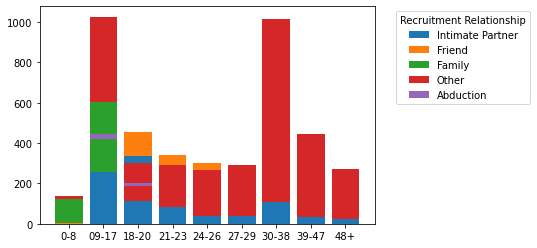

In [91]:
x_value = rr_df2["Age Group"]
int_prtnr = rr_df2["Recruitment Relationship: Intimate Partner"]
friend = rr_df2["Recruitment Relationship: Friend"]
family = rr_df2["Recruitment Relationship: Family"]
other = rr_df2["Recruitment Relationship: Other"]
abdctn = rr_df2["Recruitment Relationship: Abduction"]
plt.bar(x_value, int_prtnr ,label='Intimate Partner')
plt.bar(x_value, friend,bottom=int_prtnr, label="Friend")
plt.bar(x_value, family, bottom=friend, label= "Family")
plt.bar(x_value, other, bottom=family, label="Other")
plt.bar(x_value,abdctn, bottom=other, label = "Abduction")

plt.legend(title= "Recruitment Relationship", bbox_to_anchor=(1.05, 1))




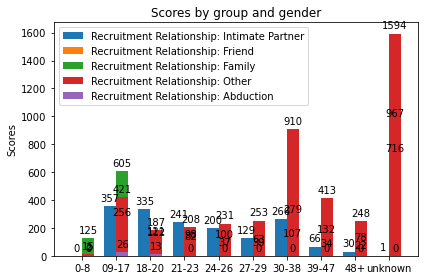

In [67]:
labels =  rr_df["Age Group"]
intimate_partner = rr_df["Recruitment Relationship: Intimate Partner"]
friend = rr_df["Recruitment Relationship: Friend"]
family = rr_df["Recruitment Relationship: Family"]
other = rr_df["Recruitment Relationship: Other"]
# unknown = rr_df["Recruitment Relationship: Unknown"]
abduction = rr_df["Recruitment Relationship: Abduction"]


# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, intimate_partner, width, label="Recruitment Relationship: Intimate Partner")
rects2 = ax.bar(x + width/2, friend, width, label="Recruitment Relationship: Friend")
rects3 = ax.bar(x + width/2, family, width, label="Recruitment Relationship: Family")
rects4 = ax.bar(x + width/2, other, width, label="Recruitment Relationship: Other")
# rects5 = ax.bar(x + width/2, unknown, width, label="Recruitment Relationship: Unknown")
rects6 = ax.bar(x + width/2, abduction, width, label="Recruitment Relationship: Abduction")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
# autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()

# MEANS OF CONTROL


In [13]:
#moc = means of control df 
moc_df = compl_df.loc[:,['gender', 'ageBroad', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'Citizenship Country','Exploit Country' ]]
moc_df.head()

,gender,ageBroad,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,...,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,Citizenship Country,Exploit Country
0,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
1,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
2,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
3,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown
4,Female,18--20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Colombia,unknown


In [14]:
#means of control sum by age
#this code can be cleaned up by just doing moc_age.sum()
moc_age = moc_df.groupby("ageBroad")
moc_debtbondage = moc_age["meansOfControlDebtBondage"].sum()
moc_takeearnings = moc_age['meansOfControlTakesEarnings'].sum()
moc_rstrct_fin_acc = moc_age['meansOfControlRestrictsFinancialAccess'].sum()
moc_threat= moc_age['meansOfControlThreats'].sum()
moc_psychabuse = moc_age['meansOfControlPsychologicalAbuse'].sum()
moc_physabuse = moc_age['meansOfControlPhysicalAbuse'].sum()
moc_sexualabuse= moc_age['meansOfControlSexualAbuse'].sum()
moc_flseprmse = moc_age['meansOfControlFalsePromises'].sum()
moc_drugabuse = moc_age['meansOfControlPsychoactiveSubstances'].sum()
moc_rstrct_mvmnt = moc_age['meansOfControlRestrictsMovement'].sum()
moc_rstrct_medcare = moc_age['meansOfControlRestrictsMedicalCare'].sum()
moc_excsv_wrkhrs = moc_age['meansOfControlExcessiveWorkingHours'].sum()
moc_usechldrn = moc_age['meansOfControlUsesChildren'].sum()
moc_lawenfcrment = moc_age['meansOfControlThreatOfLawEnforcement'].sum()
moc_wthhldneccsty = moc_age['meansOfControlWithholdsNecessities'].sum()
moc_wthlddoc = moc_age['meansOfControlWithholdsDocuments'].sum()
moc_others = moc_age['meansOfControlOther'].sum()
moc_unknown = moc_age['meansOfControlNotSpecified'].sum()

In [15]:
sum_all = moc_age.sum()

In [16]:
#creating a datafrom from the all the sums variables
moc_table = pd.DataFrame({"Debt Bondage" : moc_debtbondage, "Earning Control" : moc_takeearnings,
                         "Restrict Financial Access": moc_rstrct_fin_acc, "Threats": moc_threat,
                         "Psychological Abuse" : moc_psychabuse, "Physical Abuse": moc_physabuse,
                         "Sexual Abuse": moc_sexualabuse, "False Promise": moc_flseprmse,
                          "Psychoactive Substace": moc_drugabuse, "Restrict Movement": moc_rstrct_mvmnt,
                         "Restrict Medical Care": moc_rstrct_medcare,"Excessive Working Hrs": moc_excsv_wrkhrs,
                         "Control Using Children": moc_usechldrn, "Threat of Law Enforcement": moc_lawenfcrment,
                         "Withhold Necessities": moc_wthhldneccsty, "Withhold Documents": moc_wthlddoc,
                         "Others": moc_others, "Not Specified" : moc_unknown})
moc_table

,Debt Bondage,Earning Control,Restrict Financial Access,Threats,Psychological Abuse,Physical Abuse,Sexual Abuse,False Promise,Psychoactive Substace,Restrict Movement,Restrict Medical Care,Excessive Working Hrs,Control Using Children,Threat of Law Enforcement,Withhold Necessities,Withhold Documents,Others,Not Specified
ageBroad,,,,,,,,,,,,,,,,,,
0--8,0,4,0,37,88,38,45,32,5,19,2,1,2,0,3,0,13,1381
18--20,112,202,30,442,534,489,211,133,362,575,39,42,13,26,121,91,368,3031
21--23,143,290,14,474,514,484,210,213,328,531,87,148,24,86,128,160,269,3050
24--26,219,348,18,490,513,457,206,320,262,546,174,225,19,116,195,249,226,2421
27--29,137,266,14,375,373,324,116,243,166,383,131,189,18,96,109,217,142,1890
30--38,353,925,27,1003,1152,770,224,936,325,1091,474,847,33,277,417,838,289,5114
39--47,119,379,4,313,392,252,68,369,82,365,199,384,3,91,165,292,103,2122
48+,73,219,1,198,256,163,37,218,43,190,151,215,3,65,75,182,27,1220
9--17,88,143,8,630,1020,644,471,199,709,688,26,106,5,22,156,14,353,5870


In [17]:
#sum of moc
moc_age = moc_df
moc_debtbondage = moc_age["meansOfControlDebtBondage"].sum()
moc_takeearnings = moc_age['meansOfControlTakesEarnings'].sum()
moc_rstrct_fin_acc = moc_age['meansOfControlRestrictsFinancialAccess'].sum()
moc_threat= moc_age['meansOfControlThreats'].sum()
moc_psychabuse = moc_age['meansOfControlPsychologicalAbuse'].sum()
moc_physabuse = moc_age['meansOfControlPhysicalAbuse'].sum()
moc_sexualabuse= moc_age['meansOfControlSexualAbuse'].sum()
moc_flseprmse = moc_age['meansOfControlFalsePromises'].sum()
moc_drugabuse = moc_age['meansOfControlPsychoactiveSubstances'].sum()
moc_rstrct_mvmnt = moc_age['meansOfControlRestrictsMovement'].sum()
moc_rstrct_medcare = moc_age['meansOfControlRestrictsMedicalCare'].sum()
moc_excsv_wrkhrs = moc_age['meansOfControlExcessiveWorkingHours'].sum()
moc_usechldrn = moc_age['meansOfControlUsesChildren'].sum()
moc_lawenfcrment = moc_age['meansOfControlThreatOfLawEnforcement'].sum()
moc_wthhldneccsty = moc_age['meansOfControlWithholdsNecessities'].sum()
moc_wthlddoc = moc_age['meansOfControlWithholdsDocuments'].sum()
moc_others = moc_age['meansOfControlOther'].sum()
moc_unknown = moc_age['meansOfControlNotSpecified'].sum()

In [18]:
#Total Sum of MEANS OF CONTROL
moc_sum_df = pd.DataFrame({"Blank": [0],"Debt Bondage" : moc_debtbondage, "Earning Control" : moc_takeearnings,
                         "Restrict Financial Access": moc_rstrct_fin_acc, "Threats": moc_threat,
                         "Psychological Abuse" : moc_psychabuse, "Physical Abuse": moc_physabuse,
                         "Sexual Abuse": moc_sexualabuse, "False Promise": moc_flseprmse,
                          "Psychoactive Substace": moc_drugabuse, "Restrict Movement": moc_rstrct_mvmnt,
                         "Restrict Medical Care": moc_rstrct_medcare,"Excessive Working Hrs": moc_excsv_wrkhrs,
                         "Control Using Children": moc_usechldrn, "Threat of Law Enforcement": moc_lawenfcrment,
                         "Withhold Necessities": moc_wthhldneccsty, "Withhold Documents": moc_wthlddoc,
                         "Others": moc_others, "Not Specified" : moc_unknown})
moc_sum_df

,Blank,Debt Bondage,Earning Control,Restrict Financial Access,Threats,Psychological Abuse,Physical Abuse,Sexual Abuse,False Promise,Psychoactive Substace,Restrict Movement,Restrict Medical Care,Excessive Working Hrs,Control Using Children,Threat of Law Enforcement,Withhold Necessities,Withhold Documents,Others,Not Specified
0,0,1281,2776,116,3972,4845,3632,1594,2756,2282,4415,1283,2157,120,779,1369,2076,1873,26592


In [19]:
moc_sum_df = moc_sum_df.drop(columns=['Blank'])


In [20]:
x_values = moc_sum_df.columns()
x_values

TypeError: 'Index' object is not callable

In [ ]:
# moc_df.plot.bar()

#  COUNTRY OF ORIGIN

In [ ]:
origin_df = compl_df.loc[:,['gender', 'ageBroad',
       'majorityStatus','Citizenship Country',
       'CountryOfExploitation','Citizenship Region', 'Citizenship Sub-Region',
       'Citizenship Intermediate Region']]

In [ ]:
country_origin = origin_df.groupby(["gender",'Citizenship Country'])
country_count = country_origin['Citizenship Country'].count()

bycitizen_df = pd.DataFrame({"Trafficking Size" : country_count})
bycitizen_df

In [ ]:
male_citzenship = origin_df.loc[origin_df["gender"] == "Male"]

male_origin = male_citzenship.groupby(['Citizenship Country'])
male_count = male_origin['Citizenship Country'].count()

male_origin_df = pd.DataFrame({"Trafficking Size" : male_count})
male_origin_df

In [ ]:
female_citzenship = origin_df.loc[origin_df["gender"] == "Female"]

female_origin = female_citzenship.groupby(['Citizenship Country'])
female_count = female_origin['Citizenship Country'].count()

female_origin_df = pd.DataFrame({"Trafficking Size" : female_count})
female_origin_df